SHAP Values Shape: (4,)
Feature Names Shape: 4


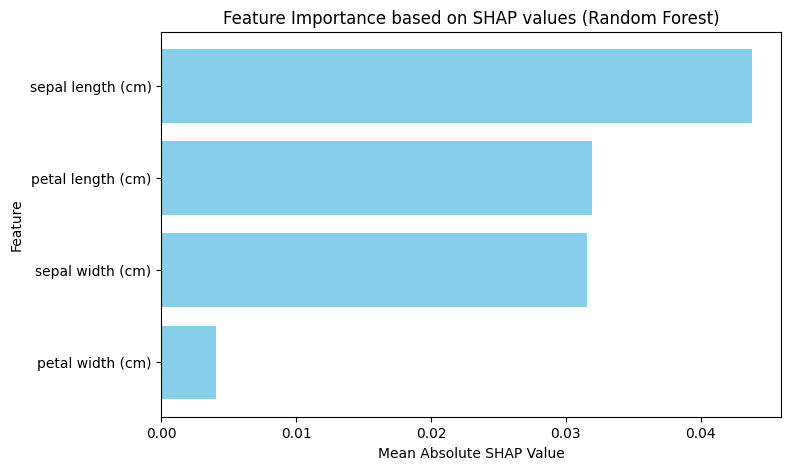

In [19]:
# Install SHAP if not installed
!pip install shap --quiet

# Import necessary libraries
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Scale features to ensure SHAP works better
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔥 Use a more powerful **RandomForestClassifier**
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Use SHAP TreeExplainer for tree-based models
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# ✅ Aggregate SHAP values correctly for multi-class classification
if isinstance(shap_values, list):
    shap_values = np.mean(np.abs(shap_values), axis=0)  # Mean over all classes

# ✅ Compute mean absolute SHAP values per feature & Flatten to 1D
shap_values_mean = np.mean(np.abs(shap_values), axis=0).flatten()

# ✅ Ensure SHAP values & feature names match
if len(shap_values_mean) != len(X.columns):
    shap_values_mean = shap_values_mean[:len(X.columns)]

# Debugging prints
print(f"SHAP Values Shape: {shap_values_mean.shape}")  # Should be (4,)
print(f"Feature Names Shape: {len(X.columns)}")  # Should be 4

# ✅ Convert to Pandas DataFrame
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Value': shap_values_mean
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by="SHAP Value", ascending=False)

# 🔥 Plot updated feature importance bar chart
plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['SHAP Value'], color='skyblue')
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Feature")
plt.title("Feature Importance based on SHAP values (Random Forest)")
plt.gca().invert_yaxis()
plt.show()
